In [1]:
import earthaccess
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [2]:
auth = earthaccess.login()

In [3]:
results = earthaccess.search_data(
    short_name="PACE_OCI_L2_SFREFL",
    #version="2.0",
    temporal=("2025-01-15T081844", "2025-01-15T083000"),
)

In [4]:
for item in results:
    display(item)

Collection: {'ShortName': 'PACE_OCI_L2_SFREFL', 'Version': '3.0'}
Spatial coverage: {'HorizontalSpatialDomain': {'Geometry': {'GPolygons': [{'Boundary': {'Points': [{'Latitude': -51.84517, 'Longitude': 101.42947}, {'Latitude': -58.94962, 'Longitude': 58.54054}, {'Latitude': -76.20618, 'Longitude': 50.91368}, {'Latitude': -65.15723, 'Longitude': 126.55175}, {'Latitude': -51.84517, 'Longitude': 101.42947}]}}]}}}
Temporal coverage: {'RangeDateTime': {'BeginningDateTime': '2025-01-15T08:18:44Z', 'EndingDateTime': '2025-01-15T08:23:43Z'}}
Size(MB): 679.4644088745117
Data: ['https://obdaac-tea.earthdatacloud.nasa.gov/ob-cumulus-prod-public/PACE_OCI.20250115T081844.L2.SFREFL.V3_0.nc']

Collection: {'Version': '3.0', 'ShortName': 'PACE_OCI_L2_SFREFL'}
Spatial coverage: {'HorizontalSpatialDomain': {'Geometry': {'GPolygons': [{'Boundary': {'Points': [{'Latitude': -35.51664, 'Longitude': 89.39059}, {'Latitude': -41.27262, 'Longitude': 58.70869}, {'Latitude': -58.9394, 'Longitude': 58.54043}, {'Latitude': -51.83648, 'Longitude': 101.41885}, {'Latitude': -35.51664, 'Longitude': 89.39059}]}}]}}}
Temporal coverage: {'RangeDateTime': {'BeginningDateTime': '2025-01-15T08:23:44Z', 'EndingDateTime': '2025-01-15T08:28:43Z'}}
Size(MB): 722.7635803222656
Data: ['https://obdaac-tea.earthdatacloud.nasa.gov/ob-cumulus-prod-public/PACE_OCI.20250115T082344.L2.SFREFL.V3_0.nc']

Collection: {'Version': '3.0', 'ShortName': 'PACE_OCI_L2_SFREFL'}
Spatial coverage: {'HorizontalSpatialDomain': {'Geometry': {'GPolygons': [{'Boundary': {'Points': [{'Latitude': -12.94595, 'Longitude': 80.86102}, {'Latitude': -18.03837, 'Longitude': 56.14588}, {'Latitude': -41.2621, 'Longitude': 58.70901}, {'Latitude': -35.50648, 'Longitude': 89.38628}, {'Latitude': -12.94595, 'Longitude': 80.86102}]}}]}}}
Temporal coverage: {'RangeDateTime': {'BeginningDateTime': '2025-01-15T08:28:44Z', 'EndingDateTime': '2025-01-15T08:33:43Z'}}
Size(MB): 751.1031980514526
Data: ['https://obdaac-tea.earthdatacloud.nasa.gov/ob-cumulus-prod-public/PACE_OCI.20250115T082844.L2.SFREFL.V3_0.nc']

In [5]:
paths = earthaccess.download(results, "data")

In [6]:
paths = sorted(paths)
concat = {"combine": "nested", "concat_dim": "number_of_lines"}
dataset = xr.merge(
    (
        xr.open_mfdataset(paths, group="geophysical_data", **concat),
        xr.open_mfdataset(paths, group="navigation_data", **concat),
        xr.open_mfdataset(paths, group="scan_line_attributes", **concat),
        xr.open_dataset(paths[0], group="sensor_band_parameters"),
    )
)

/tmp/ipykernel_521/2456380161.py:7: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  xr.open_mfdataset(paths, group="scan_line_attributes", **concat),
/tmp/ipykernel_521/2456380161.py:7: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  xr.open_mfdataset(paths, group="scan_line_attributes", **concat),
/tmp/ipykernel_521/2456380161.py:7: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  xr.open_mfdataset(paths, group="scan_line_attributes", **concat),


In [7]:
dataset

<xarray.Dataset> Size: 3GB
Dimensions:        (number_of_lines: 5129, pixels_per_line: 1272,
                    wavelength_3d: 122, number_of_bands: 286,
                    number_of_reflective_bands: 286)
Coordinates:
  * wavelength_3d  (wavelength_3d) float64 976B 346.0 351.0 ... 2.258e+03
Dimensions without coordinates: number_of_lines, pixels_per_line,
                                number_of_bands, number_of_reflective_bands
Data variables: (12/27)
    rhos           (number_of_lines, pixels_per_line, wavelength_3d) float32 3GB dask.array<chunksize=(32, 256, 40), meta=np.ndarray>
    l2_flags       (number_of_lines, pixels_per_line) int32 26MB dask.array<chunksize=(256, 1272), meta=np.ndarray>
    longitude      (number_of_lines, pixels_per_line) float32 26MB dask.array<chunksize=(256, 1272), meta=np.ndarray>
    latitude       (number_of_lines, pixels_per_line) float32 26MB dask.array<chunksize=(256, 1272), meta=np.ndarray>
    tilt           (number_of_lines) float32 21kB dask.array<chunksize=(32,), meta=np.ndarray>
    year           (number_of_lines) float64 41kB dask.array<chunksize=(32,), meta=np.ndarray>
    ...             ...
    F0             (number_of_reflective_bands) float32 1kB ...
    aw             (number_of_reflective_bands) float32 1kB ...
    bbw            (number_of_reflective_bands) float32 1kB ...
    k_oz           (number_of_reflective_bands) float32 1kB ...
    k_no2          (number_of_reflective_bands) float32 1kB ...
    Tau_r          (number_of_reflective_bands) float32 1kB ...

In [8]:
dataset = dataset.set_coords(("longitude", "latitude"))
dataset

<xarray.Dataset> Size: 3GB
Dimensions:        (number_of_lines: 5129, pixels_per_line: 1272,
                    wavelength_3d: 122, number_of_bands: 286,
                    number_of_reflective_bands: 286)
Coordinates:
  * wavelength_3d  (wavelength_3d) float64 976B 346.0 351.0 ... 2.258e+03
    longitude      (number_of_lines, pixels_per_line) float32 26MB dask.array<chunksize=(256, 1272), meta=np.ndarray>
    latitude       (number_of_lines, pixels_per_line) float32 26MB dask.array<chunksize=(256, 1272), meta=np.ndarray>
Dimensions without coordinates: number_of_lines, pixels_per_line,
                                number_of_bands, number_of_reflective_bands
Data variables: (12/25)
    rhos           (number_of_lines, pixels_per_line, wavelength_3d) float32 3GB dask.array<chunksize=(32, 256, 40), meta=np.ndarray>
    l2_flags       (number_of_lines, pixels_per_line) int32 26MB dask.array<chunksize=(256, 1272), meta=np.ndarray>
    tilt           (number_of_lines) float32 21kB dask.array<chunksize=(32,), meta=np.ndarray>
    year           (number_of_lines) float64 41kB dask.array<chunksize=(32,), meta=np.ndarray>
    day            (number_of_lines) timedelta64[ns] 41kB dask.array<chunksize=(32,), meta=np.ndarray>
    msec           (number_of_lines) timedelta64[ns] 41kB dask.array<chunksize=(32,), meta=np.ndarray>
    ...             ...
    F0             (number_of_reflective_bands) float32 1kB ...
    aw             (number_of_reflective_bands) float32 1kB ...
    bbw            (number_of_reflective_bands) float32 1kB ...
    k_oz           (number_of_reflective_bands) float32 1kB ...
    k_no2          (number_of_reflective_bands) float32 1kB ...
    Tau_r          (number_of_reflective_bands) float32 1kB ...

In [9]:
red = dataset["rhos"].sel({"wavelength_3d": 645}) # 645 nm
green = dataset["rhos"].sel({"wavelength_3d": 555}) # 555 nm
blue = dataset["rhos"].sel({"wavelength_3d": 465}) # 465 nm

In [11]:
rgb = dataset["rhos"].sel({"wavelength_3d": [645, 555, 368]}, method="nearest")

Image shape: (5129, 1272, 3)


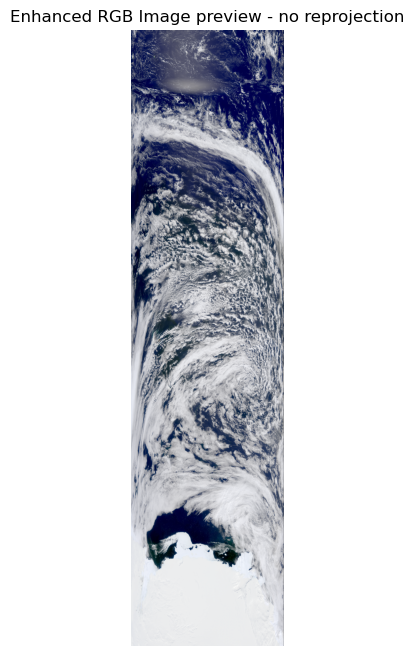

In [37]:
from PIL import Image, ImageEnhance
import numpy as np

# Select the wavelengths and set parameters
rgb = dataset["rhos"].sel({"wavelength_3d": [645, 555, 440]}, method="nearest")
scale = 0.01
vmin = 0
vmax = 1.1
gamma = 1
contrast = 1.1
brightness = 1
sharpness = 1.1
saturation = 1

# Apply your processing steps
rgb = rgb.where(rgb > 0)
rgb = np.log(rgb / scale) / np.log(1 / scale)
rgb = rgb.where(rgb >= vmin, vmin)
rgb = rgb.where(rgb <= vmax, vmax)    
rgb = (rgb - rgb.min()) / (rgb.max() - rgb.min())
rgb = rgb * gamma

# Convert to 8-bit image format
img = rgb * 255
img = img.where(img.notnull(), 0).astype("uint8")

# COMPUTE the dask array to numpy before using PIL
img_numpy = img.compute().values  # This converts dask array to numpy array

# Check the shape and adjust if necessary for PIL
print(f"Image shape: {img_numpy.shape}")

# PIL expects the wavelength dimension to be last, so we might need to transpose
# If shape is (wavelength, y, x), transpose to (y, x, wavelength)
if img_numpy.shape[0] == 3:  # wavelength dimension is first
    img_numpy = np.transpose(img_numpy, (1, 2, 0))

# Now PIL can work with the numpy array
img_pil = Image.fromarray(img_numpy)

# Apply enhancements
enhancer = ImageEnhance.Contrast(img_pil)
img_pil = enhancer.enhance(contrast)

enhancer = ImageEnhance.Brightness(img_pil)
img_pil = enhancer.enhance(brightness)

enhancer = ImageEnhance.Sharpness(img_pil)
img_pil = enhancer.enhance(sharpness)

enhancer = ImageEnhance.Color(img_pil)
img_pil = enhancer.enhance(saturation)

# Convert back to numpy array and normalize to 0-1 range
rgb_enhanced = np.array(img_pil) / 255


plt.figure(figsize=(10, 8))
plt.imshow(rgb_enhanced, origin='lower')
plt.axis('off')
plt.title('Enhanced RGB Image preview - no reprojection')
plt.show()

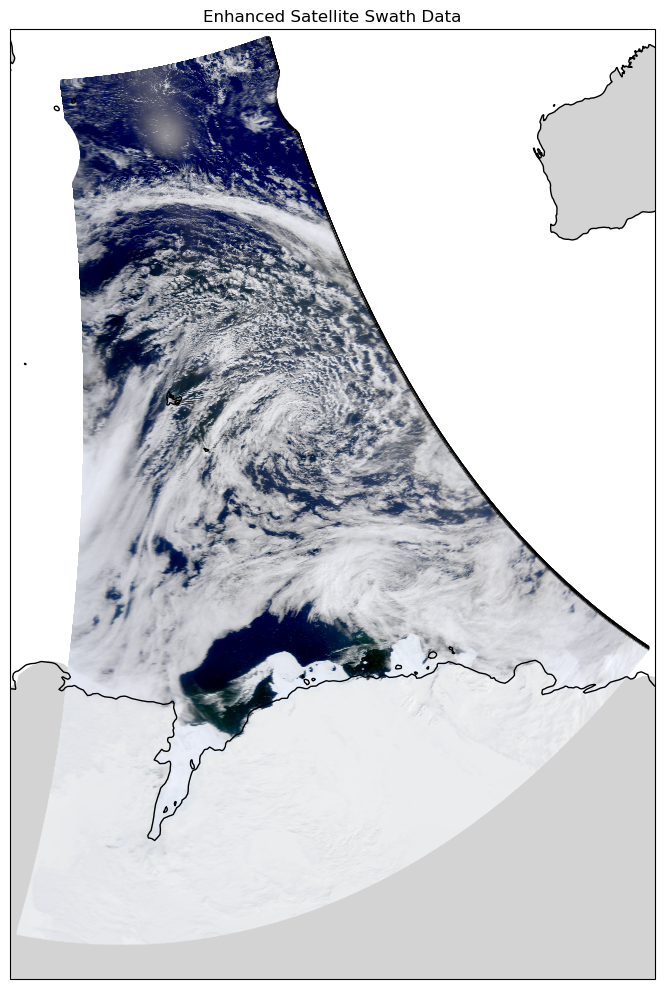

In [38]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import numpy as np

# Create a figure with desired projection
projection = ccrs.Mercator()  #Change projection here
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(1, 1, 1, projection=projection)

# Add map features
ax.coastlines(resolution='50m')
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray')

min_lon = float(dataset.longitude.min().compute())
max_lon = float(dataset.longitude.max().compute())
min_lat = float(dataset.latitude.min().compute())
max_lat = float(dataset.latitude.max().compute())

# Set map extent with buffer
buffer = 1  # degrees
ax.set_extent([min_lon-buffer, max_lon+buffer, min_lat-buffer, max_lat+buffer], crs=ccrs.PlateCarree())

# Get the longitude, latitude data as numpy arrays
lons = dataset.longitude.compute().values
lats = dataset.latitude.compute().values

# Use the enhanced RGB image
rgb_numpy = rgb_enhanced

# Using scatter with RGB values
sc = ax.scatter(
    lons.flatten(),
    lats.flatten(),
    c=rgb_numpy.reshape(-1, 3), 
    transform=ccrs.PlateCarree(),
    s=3,  # Adjust point size to control overlap/gaps
    marker='s',  # Square markers often work better for imagery
)

# Add gridlines
#gl = ax.gridlines(draw_labels=True, linestyle='--', alpha=0.7)
#gl.top_labels = False
#gl.right_labels = False

plt.title('Enhanced Satellite Swath Data')
plt.tight_layout()
plt.show()